In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import calculations

In [2]:
# Process data

stimuli = []
scale_type = {
    "gesture_pitch_number": 100,
    "gesture_pitch_greyscale": 49,
    "gesture_roll_number": 100,
    "gesture_roll_greyscale": 49,
    "slider_number": 1,
    "slider_greyscale": 1,
}

with open('experiment_data/combined_participant_data.json', 'r') as file:
    data = json.load(file)

    if data:
        for participant in data:
            for experiment in participant["completedExperiments"]:
                experiment_type = experiment.get("experimentType")
                for stimulus in experiment["successfulStimuli"]:
                    sensor_reading = stimulus.get("sensorReading", {})
                    quaternion = (
                        sensor_reading.get("w"),
                        sensor_reading.get("x"),
                        sensor_reading.get("y"),
                        sensor_reading.get("z")
                    )
                    # Remap quaternion -- the stored data from device app is in an incorrect order
                    x, y, z, w = quaternion
                    _, roll, pitch = calculations.quaternion_to_euler(x, y, z, w)
                    
                    sensor_reading["roll"] = roll
                    sensor_reading["pitch"] = pitch

                    pitch_scaled = calculations.scale_pitch(pitch, scale_type[experiment_type])
                    roll_scaled = calculations.scale_roll(roll, scale_type[experiment_type])
                    truth_value = stimulus.get("truth")
                    
                    pitch_difference = abs(truth_value - pitch_scaled)
                    roll_difference = abs(truth_value - roll_scaled)

                    stimulus["pitch"] = pitch
                    stimulus["pitch_truth"] = pitch_scaled
                    stimulus["pitch_truth_diff"] = pitch_difference
                
                    stimulus["roll"] = roll
                    stimulus["roll_truth"] = roll_scaled
                    stimulus["roll_truth_diff"] = roll_difference
                    
                    if truth_value == 0:
                        stimulus["pitch_truth_diff_percentage"] = (pitch_scaled / scale_type[experiment_type]) * 100
                        stimulus["roll_truth_diff_percentage"] = (roll_scaled / scale_type[experiment_type]) * 100
                    else:
                        stimulus["pitch_truth_diff_percentage"] = (pitch_difference / truth_value) * 100
                        stimulus["roll_truth_diff_percentage"] = (roll_difference / truth_value) * 100
                        
                    stimulus["experiment_type"] = experiment_type
                    stimulus["calibration"] = sensor_reading.get("calibration_status")
                            
                    stimuli.append(stimulus)

df = pd.DataFrame(data=stimuli)

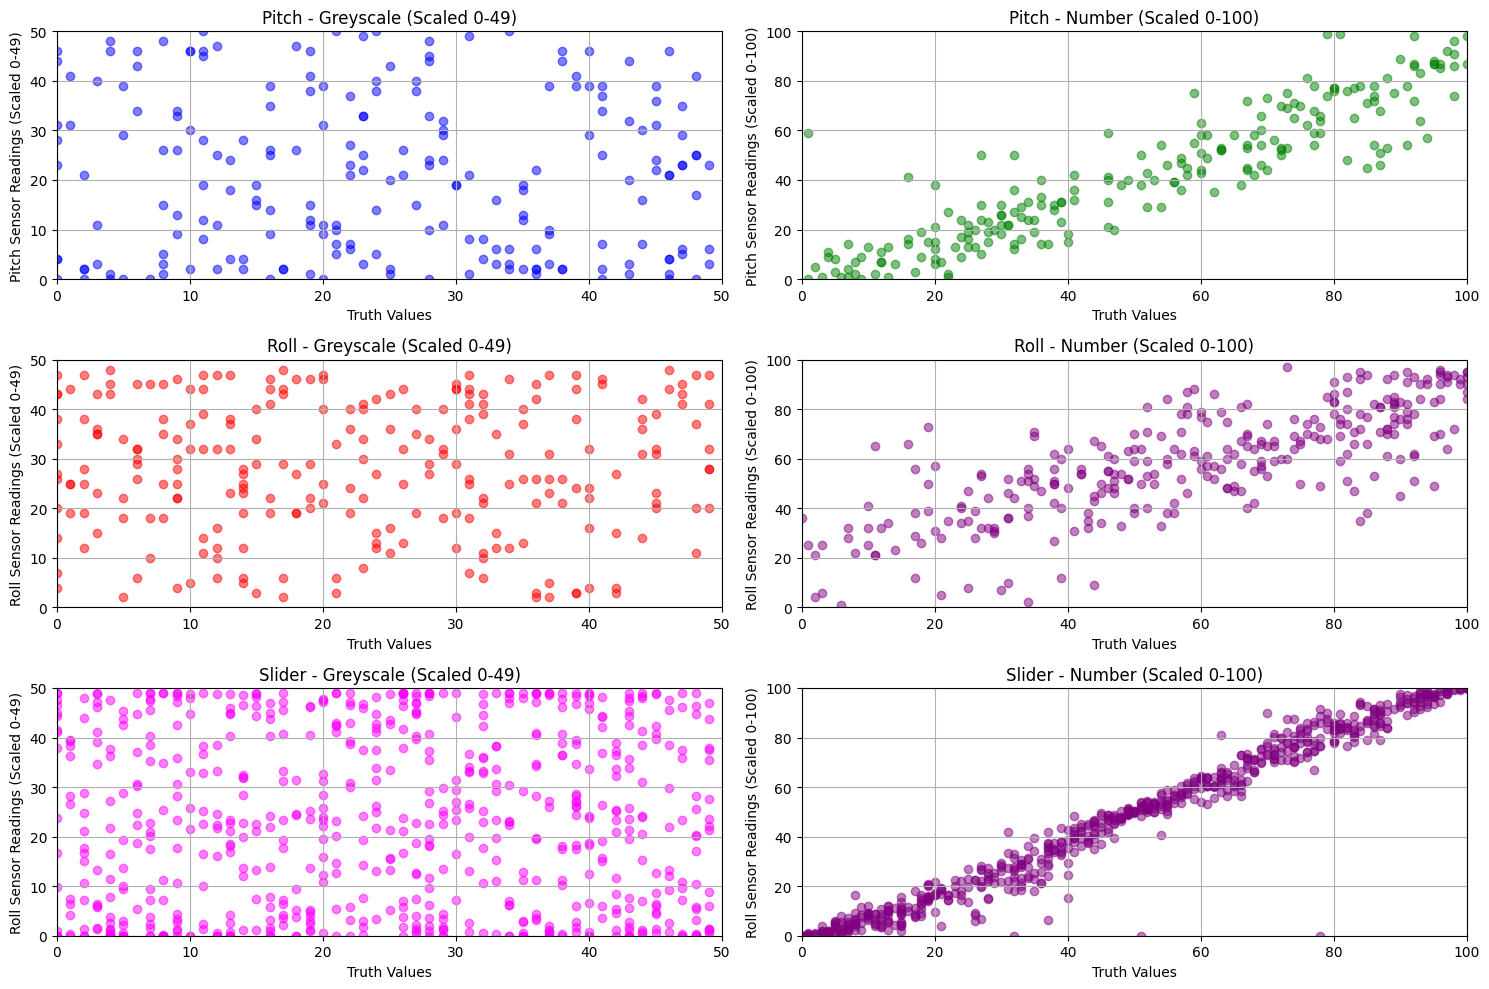

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

g_pitch_greyscale_df = df[(df["experiment_type"] == "gesture_pitch_greyscale") & (df["calibration"] <= 1)]

axes[0, 0].scatter(g_pitch_greyscale_df["truth"], g_pitch_greyscale_df["pitch_truth"], c='blue', alpha=0.5)
axes[0, 0].set_title('Pitch - Greyscale (Scaled 0-49)')
axes[0, 0].set_xlabel('Truth Values')
axes[0, 0].set_ylabel('Pitch Sensor Readings (Scaled 0-49)')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 50)
axes[0, 0].set_ylim(0, 50)


g_pitch_number_df = df[(df["experiment_type"] == "gesture_pitch_number") & (df["calibration"] <= 1)]

axes[0, 1].scatter(g_pitch_number_df["truth"], g_pitch_number_df["pitch_truth"], c='green', alpha=0.5)
axes[0, 1].set_title('Pitch - Number (Scaled 0-100)')
axes[0, 1].set_xlabel('Truth Values')
axes[0, 1].set_ylabel('Pitch Sensor Readings (Scaled 0-100)')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_ylim(0, 100)

g_roll_greyscale_df = df[(df["experiment_type"] == "gesture_roll_greyscale") & (df["calibration"] <= 1)]

axes[1, 0].scatter(g_roll_greyscale_df["truth"], g_roll_greyscale_df["roll_truth"], c='red', alpha=0.5)
axes[1, 0].set_title('Roll - Greyscale (Scaled 0-49)')
axes[1, 0].set_xlabel('Truth Values')
axes[1, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 50)

g_roll_number_df = df[(df["experiment_type"] == "gesture_roll_number") & (df["calibration"] <= 1)]

axes[1, 1].scatter(g_roll_number_df["truth"], g_roll_number_df["roll_truth"], c='purple', alpha=0.5)
axes[1, 1].set_title('Roll - Number (Scaled 0-100)')
axes[1, 1].set_xlabel('Truth Values')
axes[1, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 100)

g_slider_greyscale_df = df[(df["experiment_type"] == "slider_greyscale")]

axes[2, 0].scatter(g_slider_greyscale_df["truth"], g_slider_greyscale_df["value"], c='magenta', alpha=0.5)
axes[2, 0].set_title('Slider - Greyscale (Scaled 0-49)')
axes[2, 0].set_xlabel('Truth Values')
axes[2, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[2, 0].grid(True)
axes[2, 0].set_xlim(0, 50)
axes[2, 0].set_ylim(0, 50)

g_slider_number_df = df[(df["experiment_type"] == "slider_number")]

axes[2, 1].scatter(g_slider_number_df["truth"], g_slider_number_df["value"], c='purple', alpha=0.5)
axes[2, 1].set_title('Slider - Number (Scaled 0-100)')
axes[2, 1].set_xlabel('Truth Values')
axes[2, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, 100)
axes[2, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

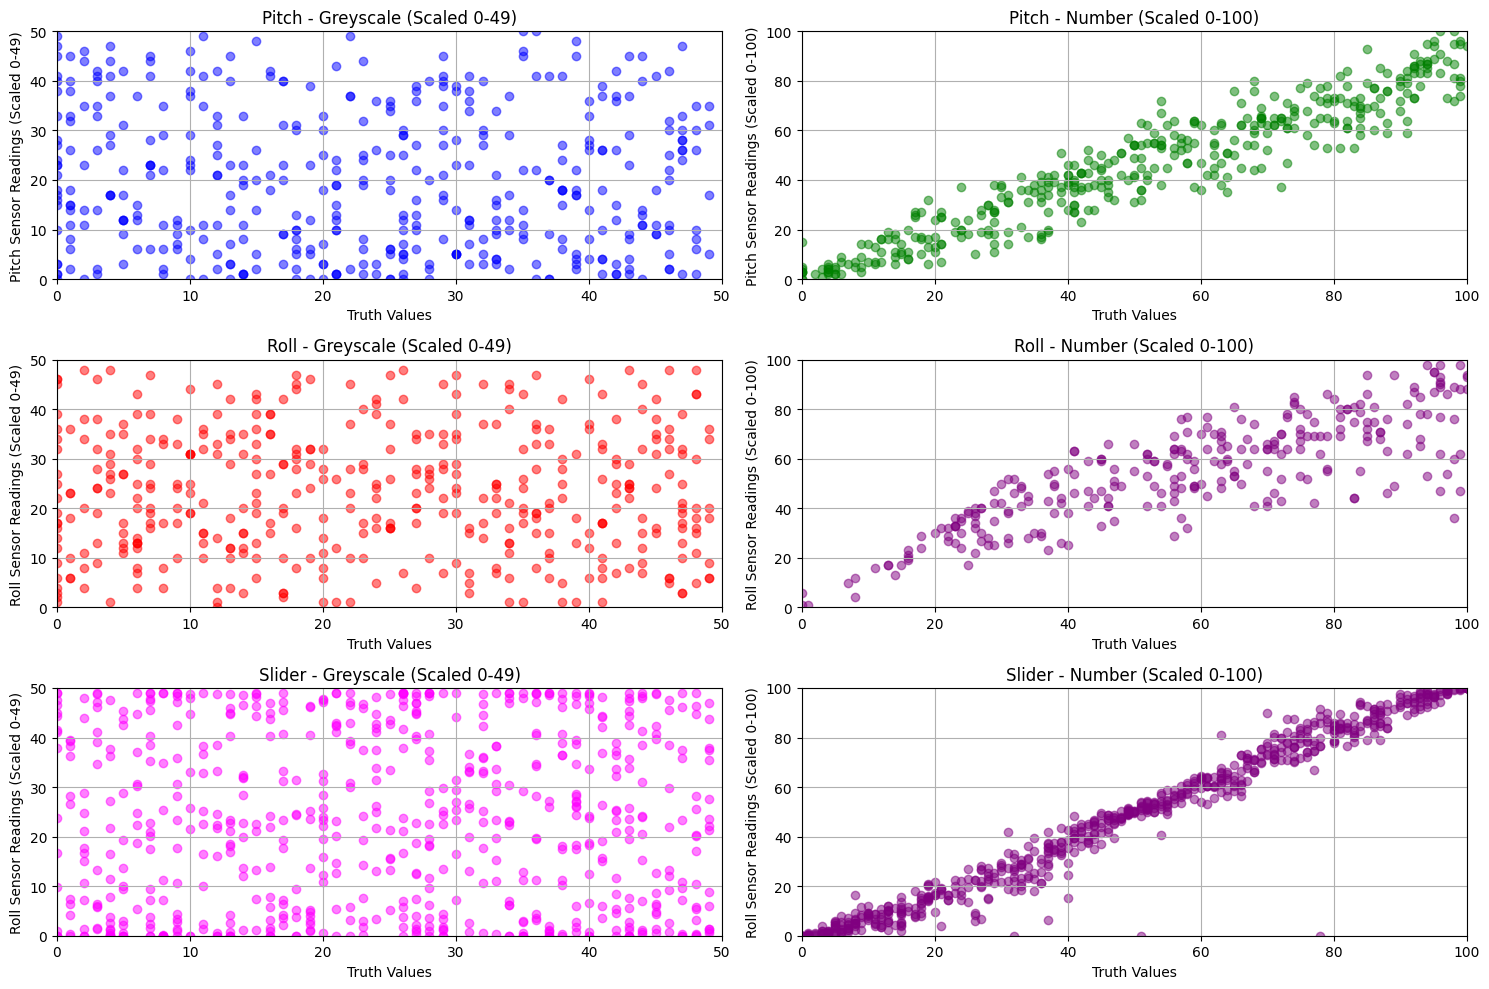

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

g_pitch_greyscale_df = df[(df["experiment_type"] == "gesture_pitch_greyscale") & (df["calibration"] >= 2)]

axes[0, 0].scatter(g_pitch_greyscale_df["truth"], g_pitch_greyscale_df["pitch_truth"], c='blue', alpha=0.5)
axes[0, 0].set_title('Pitch - Greyscale (Scaled 0-49)')
axes[0, 0].set_xlabel('Truth Values')
axes[0, 0].set_ylabel('Pitch Sensor Readings (Scaled 0-49)')
axes[0, 0].grid(True)
axes[0, 0].set_xlim(0, 50)
axes[0, 0].set_ylim(0, 50)


g_pitch_number_df = df[(df["experiment_type"] == "gesture_pitch_number") & (df["calibration"] >= 2) & (df["pitch_truth_diff_percentage"] <= 70)]

axes[0, 1].scatter(g_pitch_number_df["truth"], g_pitch_number_df["pitch_truth"], c='green', alpha=0.5)
axes[0, 1].set_title('Pitch - Number (Scaled 0-100)')
axes[0, 1].set_xlabel('Truth Values')
axes[0, 1].set_ylabel('Pitch Sensor Readings (Scaled 0-100)')
axes[0, 1].grid(True)
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_ylim(0, 100)

g_roll_greyscale_df = df[(df["experiment_type"] == "gesture_roll_greyscale") & (df["calibration"] >= 2)]

axes[1, 0].scatter(g_roll_greyscale_df["truth"], g_roll_greyscale_df["roll_truth"], c='red', alpha=0.5)
axes[1, 0].set_title('Roll - Greyscale (Scaled 0-49)')
axes[1, 0].set_xlabel('Truth Values')
axes[1, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[1, 0].grid(True)
axes[1, 0].set_xlim(0, 50)
axes[1, 0].set_ylim(0, 50)

g_roll_number_df = df[(df["experiment_type"] == "gesture_roll_number") & (df["calibration"] >= 2) & (df["roll_truth_diff_percentage"] <= 70)]

axes[1, 1].scatter(g_roll_number_df["truth"], g_roll_number_df["roll_truth"], c='purple', alpha=0.5)
axes[1, 1].set_title('Roll - Number (Scaled 0-100)')
axes[1, 1].set_xlabel('Truth Values')
axes[1, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[1, 1].grid(True)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].set_ylim(0, 100)

g_slider_greyscale_df = df[(df["experiment_type"] == "slider_greyscale")]

axes[2, 0].scatter(g_slider_greyscale_df["truth"], g_slider_greyscale_df["value"], c='magenta', alpha=0.5)
axes[2, 0].set_title('Slider - Greyscale (Scaled 0-49)')
axes[2, 0].set_xlabel('Truth Values')
axes[2, 0].set_ylabel('Roll Sensor Readings (Scaled 0-49)')
axes[2, 0].grid(True)
axes[2, 0].set_xlim(0, 50)
axes[2, 0].set_ylim(0, 50)

g_slider_number_df = df[(df["experiment_type"] == "slider_number")]

axes[2, 1].scatter(g_slider_number_df["truth"], g_slider_number_df["value"], c='purple', alpha=0.5)
axes[2, 1].set_title('Slider - Number (Scaled 0-100)')
axes[2, 1].set_xlabel('Truth Values')
axes[2, 1].set_ylabel('Roll Sensor Readings (Scaled 0-100)')
axes[2, 1].grid(True)
axes[2, 1].set_xlim(0, 100)
axes[2, 1].set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [5]:
df[(df["experiment_type"] == "gesture_roll_number")]

,value,id,truth,inputType,sensorReading,pitch,pitch_truth,pitch_truth_diff,roll,roll_truth,roll_truth_diff,pitch_truth_diff_percentage,roll_truth_diff_percentage,experiment_type,calibration
80,0.0,1,38,device,"{'calibration_status': 2, 'timestamp': 1719217...",-13.701563,15,23,-34.033422,38,0,60.526316,0.000000,gesture_roll_number,2
81,0.0,2,47,device,"{'duration': 168, 'w': 0.311829, 'x': -0.25341...",-14.762546,16,31,-45.556644,51,4,65.957447,8.510638,gesture_roll_number,2
82,0.0,3,58,device,"{'w': 0.379944, 'stability': 'Stable', 'calibr...",-14.024461,16,42,-54.425632,60,2,72.413793,3.448276,gesture_roll_number,2
83,0.0,4,67,device,"{'z': 0.385437, 'activity': 'Still', 'calibrat...",-11.922160,13,54,-61.433203,68,1,80.597015,1.492537,gesture_roll_number,2
84,0.0,5,89,device,"{'y': 0.658081, 'stability': 'Stable', 'w': 0....",-9.682007,11,78,-84.567729,94,5,87.640449,5.617978,gesture_roll_number,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,16,95,device,"{'activity_confidence': 97, 'timestamp': 17195...",-14.529913,16,79,-62.262555,69,26,83.157895,27.368421,gesture_roll_number,1
3896,0.0,17,44,device,"{'calibration_status': 1, 'timestamp': 1719572...",-7.251884,8,36,-38.262379,43,1,81.818182,2.272727,gesture_roll_number,1
3897,0.0,18,4,device,"{'y': 0.197266, 'activity_confidence': 88, 'ti...",-5.732501,6,2,-21.586735,24,20,50.000000,500.000000,gesture_roll_number,2
3898,0.0,19,38,device,"{'activity_confidence': 97, 'y': 0.18396, 'dur...",-6.483825,7,31,-24.127987,27,11,81.578947,28.947368,gesture_roll_number,1


In [6]:
df[(df["experiment_type"] == "gesture_pitch_number") & (df["truth"] == 59)]

,value,id,truth,inputType,sensorReading,pitch,pitch_truth,pitch_truth_diff,roll,roll_truth,roll_truth_diff,pitch_truth_diff_percentage,roll_truth_diff_percentage,experiment_type,calibration
143,0.0,4,59,device,"{'duration': 122, 'activity_confidence': 67, '...",-101.071384,112,53,-46.171936,51,8,89.830508,13.559322,gesture_pitch_number,2
762,0.0,3,59,device,"{'duration': 157, 'w': 0.353882, 'calibration_...",67.094233,75,16,-4.197563,5,54,27.118644,91.525424,gesture_pitch_number,1
1288,0.0,9,59,device,"{'w': 0.411743, 'x': -0.126709, 'z': 0.902405,...",49.674796,55,4,-13.657857,15,44,6.779661,74.576271,gesture_pitch_number,2
1684,0.0,5,59,device,"{'timestamp': 1719321195, 'y': -0.260376, 'dur...",-49.450495,55,4,0.900080,1,58,6.779661,98.305085,gesture_pitch_number,1
2014,0.0,15,59,device,"{'activity_confidence': 96, 'calibration_statu...",-56.397463,63,4,-3.544956,4,55,6.779661,93.220339,gesture_pitch_number,2
2101,0.0,2,59,device,"{'timestamp': 1719335549, 'z': 0.79834, 'calib...",-57.715498,64,5,-18.292257,20,39,8.474576,66.101695,gesture_pitch_number,2
2921,0.0,2,59,device,"{'activity_confidence': 84, 'w': -0.483154, 'z...",-57.888160,64,5,-3.435936,4,55,8.474576,93.220339,gesture_pitch_number,3
3856,0.0,17,59,device,"{'z': 0.536072, 'y': 0.792847, 'activity_confi...",33.605943,37,22,2.832897,3,56,37.288136,94.915254,gesture_pitch_number,2
